In [1]:
import matplotlib
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5)) 

# 將字體換成SimHei
plt.rcParams['font.sans-serif'] = ['SimHei']

<Figure size 720x360 with 0 Axes>

In [2]:
import reportlab
import os
from reportlab.graphics.charts.lineplots import LinePlot
from reportlab.graphics.charts.piecharts import Pie
from reportlab.graphics.shapes import Drawing
from reportlab.lib import colors
from reportlab.lib.styles import ParagraphStyle
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.pdfmetrics import registerFontFamily
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.platypus import Paragraph
from reportlab.platypus import SimpleDocTemplate, Paragraph, Table, Image
from reportlab.lib.styles import getSampleStyleSheet

home = os.path.expanduser("~")

pdfmetrics.registerFont(TTFont('MSJH', './fonts/MSJH.TTC'))
pdfmetrics.registerFont(TTFont('MSJHBD', './fonts/MSJHBD.TTC'))
registerFontFamily("MSJH", normal="MSJH", bold="MSJHBD")
FONT_NAME = "MSJH"

class MyCSS:
    h1 = ParagraphStyle(name="h1", fontName=FONT_NAME, fontSize=21, leading=28, alignment=1, spaceAfter=16)
    h3 = ParagraphStyle(name="h3", fontName=FONT_NAME, fontSize=14, leading=21, spaceBefore=16)
    h5 = ParagraphStyle(name="h5", fontName=FONT_NAME, fontSize=12, leading=21, alignment=1, spaceBefore=16)
    p = ParagraphStyle(name="BodyText", fontName=FONT_NAME, fontSize=12, leading=18, spaceBefore=8, firstLineIndent=24)
    r = ParagraphStyle(name="BodyText", fontName=FONT_NAME, fontSize=12, leading=18, spaceBefore=8, firstLineIndent=24, textColor=colors.red)

class PiiPdf:
    @classmethod
    def doH1(cls, text: str):
        return Paragraph(text, MyCSS.h1)

    @classmethod
    def doH3(cls, text: str):
        return Paragraph(text, MyCSS.h3)

    @classmethod
    def doH5(cls, text: str):
        return Paragraph(text, MyCSS.h5)

    @classmethod
    def doP(cls, text: str):
        return Paragraph(text, MyCSS.p)

    @classmethod
    def doLine(cls):
        drawing = Drawing(500, 220)
        line = LinePlot()
        line.x = 50
        line.y = 50
        line.height = 125
        line.width = 300
        line.lines[0].strokeColor = colors.blue
        line.lines[1].strokeColor = colors.red
        line.lines[2].strokeColor = colors.green
        line.data = [((0, 50), (100, 100), (200, 200), (250, 210), (300, 300), (400, 800))]

        drawing.add(line)
        return drawing

    @classmethod
    def doChart(cls, data):
        drawing = Drawing(width=500, height=200)
        pie = Pie()
        pie.x = 150
        pie.y = 65
        pie.sideLabels = False
        pie.labels = [letter for letter in "abcdefg"]
        pie.data = data  # list(range(15, 105, 15))
        pie.slices.strokeWidth = 0.5

        drawing.add(pie)
        return drawing

from reportlab.platypus import TableStyle
table_style=TableStyle([
         ('FONT', (0, 0), (-1, -1), 'MSJH', 10),
         ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
         ('GRID', (0,0), (-1,-1), 0.5, colors.black),
         ('INNERGRID', (0,0), (-1,-1), 0.25, colors.black),
         ('BOX', (0,0), (-1,-1), 0.25, colors.black),
         ('BACKGROUND',(0,0),(-1,-1),colors.white)])
table_style_red = TableStyle([
         ('FONT', (0, 0), (-1, -1), 'MSJH', 10),
         ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
         ('GRID', (0,0), (-1,-1), 0.5, colors.black),
         ('INNERGRID', (0,0), (-1,-1), 0.25, colors.black),
         ('BOX', (0,0), (-1,-1), 0.25, colors.black),
         ('BACKGROUND',(0,0),(-1,-1),colors.lavender)])

In [3]:
import jieba
import jieba.analyse

jieba.set_dictionary("./dict.txt")
# 載入自定義詞庫：jieba.load_userdict(file_path)
# 加入字詞：jieba.add_word(word, freq=None, tag=None)
# 刪除字詞：jieba.del_word(word)

with open('./stopwords_zhTW.txt', encoding="utf-8") as f:
    stopword_list = [s for s in f.read().split('\n')]

In [4]:
def load_file():
    file1 = ''
    with open('./uploads/TEXT1.txt','r', encoding = 'utf-8') as load:
        file1 = load.readlines()
        load.close()
    file2 = ''
    with open('./uploads/TEXT2.txt', 'r', encoding = 'utf-8') as mem:
        file2 = mem.readlines()
    mem.close()
    return file1, file2

In [5]:
def pre_file1(file1):
    a_part = ''
    for i in range(len(file1)):
        if file1[i] != '\n':
            word_list = jieba.cut(file1[i], cut_all=False)
            for word in word_list:
                if word not in stopword_list:
                    a_part += word + " "
    return a_part

In [6]:
# 全文詞向量：文章主題＆網路爬蟲關鍵字(10)
def all_part(a_part):
    all_part = jieba.analyse.extract_tags(a_part, topK=10, withWeight=False, allowPOS=()) #topK為返回幾個TF / IDF權重最大的關鍵詞，默認值為20
    print(all_part)
    #for x, w in jieba.analyse.extract_tags(a_part, topK=10, withWeight=True):
        #print('%s %s' % (x, w))
    return all_part

In [7]:
# 詞彙分佈圖
import matplotlib.pyplot as plt
import nltk

def img(all_part):
    fig = plt.figure(figsize=(10, 5)) 
    raw = open("./uploads/TEXT1.txt", encoding = 'utf-8').read() 
    text1 = nltk.text.Text(jieba.cut(raw))
    graph1 = nltk.text.Text(text1)
    graph1.dispersion_plot(all_part)
    fig.savefig('./output/plot.png')

In [8]:
# 詞彙多樣性：全文
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [9]:
# 段落詞向量：文本對齊的關鍵字(3)
def part_(file):
    part = []
    for i in range(len(file)):
        s = file[i]
        epart = jieba.analyse.extract_tags(s, topK=3, withWeight=False, allowPOS=()) #topK為返回幾個TF / IDF權重最大的關鍵詞，默認值為20
        part.append(epart)
        print(epart)
        #for x, w in jieba.analyse.extract_tags(s, topK=3, withWeight=True):
            #print('%s %s' % (x, w))
        print()
    return part

In [10]:
def lcs(s1, s2, m, n):
    num = [[0 for i in range(n+1)] for j in range(m+1)]
    for i in range(1,m+1):
        for j in range(1, n+1):
            if s1[i-1] == s2[j-1]:
                num[i][j] = num[i-1][j-1]+1
            else:
                num[i][j] = max(num[i-1][j], num[i][j-1])
    return num[-1][-1]

In [11]:
import re, difflib
import editdistance
def analyze(partA, partB, story, file1, file2, p):
    for ai in range(len(partA)):
        for aj in partA[ai]:
            for bi in range(len(partB)):
                for bj in partB[bi]:
                    if aj == bj:
                        print("【關鍵字】：", aj)
                        sk = "【關鍵字】：" + aj
                        story.append(p.doH5(sk))
                        keyword1 = [['文本1 (段落)', '文本2 (段落)']]
                        keyword2 = [['相似度', 'LCS', '編輯距離']]
                        aList = re.split('，|。', str(file1[ai]))
                        bList = re.split('，|。', str(file2[bi]))
                        for s1 in aList:
                            if aj in s1:
                                for s2 in bList:
                                    if aj in s2:
                                        if len(s1) > 20:
                                            s1 = s1[0:20] + "..."
                                        if len(s2) > 20:
                                            s2 = s2[0:20] + "..."
                                        if str(ai+1) in s1:
                                            s1 = s1
                                        else:
                                            s1 = s1 + "   (" + str(ai+1) + ")"
                                        if str(bi+1) in s2:
                                            s2 = s2
                                        else:
                                            s2 = s2 + "   (" + str(bi+1) + ")"
                                        list1 = []
                                        list2 = []
                                        list1.append(s1)
                                        list1.append(s2)
                                        print("%1s %-50s %1s %-50s" % ("A", s1, "B", s2))  # 相似段落
                                        diff_cal = difflib.SequenceMatcher(None, s1, s2).ratio() #diff_cal
                                        diff_cal = round(diff_cal,2)
                                        list2.append(diff_cal)
                                        print("Diff: ", diff_cal)
                                        lcs_cal = lcs(s1, s2, len(s1), len(s2)) #lcs_cal
                                        list2.append(lcs_cal)
                                        print("LCS: ", lcs_cal)
                                        editDistance = editdistance.eval(s1, s2)
                                        list2.append(editDistance)
                                        print("Edit distance: ", editDistance) #editdistance
                                        print()
                                        if diff_cal >= 0.5:
                                            keyword1.append(list1)
                                            content = Table(keyword1, colWidths=240, style=table_style_red)
                                            story.append(content)
                                            
                                            keyword2.append(list2)
                                            number = Table(keyword2, colWidths=160, style=table_style_red)
                                            story.append(number)
                                        else:
                                            keyword1.append(list1)
                                            content = Table(keyword1, colWidths=240, style=table_style)
                                            story.append(content)
                                            
                                            keyword2.append(list2)
                                            number = Table(keyword2, colWidths=160, style=table_style)
                                            story.append(number)
                                        keyword1 = []
                                        keyword2 = []
    report_add = "./output/Hello_RE.pdf"
    doc = SimpleDocTemplate(report_add)
    doc.build(story)
    return report_add

In [14]:
from flask import Flask, render_template, send_from_directory, request, url_for, flash, redirect
from werkzeug.utils import secure_filename
import os

app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = 'C:/Users/yulin/anaconda3/GProject_/uploads'
ALLOWED_EXTENSIONS = set(['txt', 'pdf'])

@app.route("/")
def index():
    return render_template("index.html")
@app.route('/Background.png')
def background(): 
    return send_from_directory(os.path.join(app.root_path, '/static'), 'Background.png')
@app.route('/favicon.svg')
def favicon(): 
    return send_from_directory(os.path.join(app.root_path, '/static'), 'favicon.svg')

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

@app.route('/file-upload', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        file = request.files['file']
        if file and allowed_file(file.filename):
            filename = secure_filename(file.filename)
            file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))
            return redirect(url_for('uploaded_file',filename=filename))
            
@app.route('/uploads/<filename>')
def uploaded_file(filename):
    return send_from_directory(app.config['UPLOAD_FOLDER'],filename)


@app.route('/file-compared', methods=['POST', 'GET'])
def compared_file():
    p = PiiPdf()
    story = []
    story.append(p.doH1("<b>比對報告</b>"))
    f1,f2 = load_file()
    story.append(p.doH3("<b>全文關鍵字</b>"))
    a_part = pre_file1(f1)
    b_part = pre_file1(f2)
    allPart = all_part(a_part)
    ten_part = [['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]
    ten_part.append(allPart)
    t = Table(ten_part, colWidths=44, style=table_style)
    story.append(t)
    photo = Image('./output/plot.png', width=376, height=273)
    story.append(p.doH3("<b>詞彙分布圖</b>"))
    story.append(photo)
    img(allPart)
    story.append(p.doH3("<b>詞彙多樣性</b>"))
    score1 = lexical_diversity(a_part)
    score2 = lexical_diversity(b_part)
    score = [['文本1', '文本2']]
    score_ = [score1, score1]
    score.append(score_)
    score_F = Table(score, colWidths=220, style=table_style)
    story.append(score_F)
    story.append(p.doH3("<b>段落關鍵字</b>"))
    partA = part_(f1)
    partB = part_(f2)
    address = analyze(partA, partB, story, f1, f2, p)
    return render_template("compared.html")

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Jul/2022 03:06:37] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


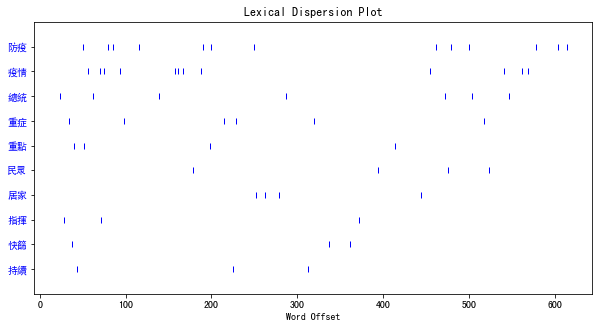

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

【關鍵字】： 疫苗
A 第四為提高「疫苗覆蓋率」   (17)                                B 第四個措施是「持續提高疫苗覆蓋率」   (22)                          
Diff:  0.7
LCS:  15
Edit distance:  10

A 第四為提高「疫苗覆蓋率」   (17)                                B 目前疫苗覆蓋率第一劑是84.57%、第二...   (22)                    
Diff:  0.41
LCS:  10
Edit distance:  24

A 第四為提高「疫苗覆蓋率」   (17)                                B 提醒長輩接種疫苗   (22)                                   
Diff:  0.47
LCS:  8
Edit distance:  12

A 第四為提高「疫苗覆蓋率」   (17)                                B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.37
LCS:  7
Edit distance:  14

A 第四為提高「疫苗覆蓋率」   (17)                                B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.61
LCS:  11
Edit distance:  9

A 有時間就陪長輩接種疫苗   (17)                                 B 第四個措施是「持續提高疫苗覆蓋率」   (22)                          
Diff:  0.33
LCS:  7
Edit distance:  17

A 有時間就陪長輩接種疫苗   (17)                                 B 目前疫苗覆蓋率第一劑是84.57%、第二...   (22)                    
Diff:  

127.0.0.1 - - [05/Jul/2022 03:06:39] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:08:04] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


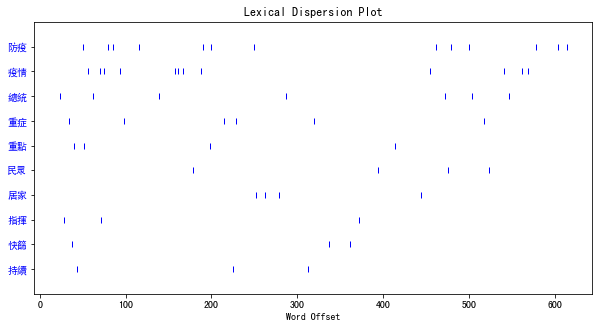

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  8
Edit distance:  18

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 有四個重點的防疫措施   (14)                                 
Diff:  0.34
LCS:  8
Edit distance:  24

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 則分別安排入住加強版集中檢疫所、防疫旅館...   (14)                    
Diff:  0.37
LCS:  11
Edit distance:  21

A 民眾應主動配合防疫工作   (15)                                 B 蔡總統說台灣要邁入防疫新階段   (14)                             
Diff:  0.41
LCS:  8
Edit distance:  13

A 民眾應主動配合防疫工作   (15)                                 B 有四個重點的防疫措施   (14)                                 
Diff:  0.46
LCS:  8
Edit distance:  10

A 民眾應主動配合防疫工作   (15)                                 B 則分別安排入住加強版集中檢疫所、防疫旅館...   (14)                    
Diff:  0.33
LCS:  8
Edit distance:  22

【關鍵字】： 長輩
A 長輩是重症死亡高風險群   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.42
LCS:  7
Edit distance:  13

A 長輩是重症死亡高風險群   (17)                                 B 有時間就陪長輩去接種疫苗   (22)           

127.0.0.1 - - [05/Jul/2022 03:08:07] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:08:13] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


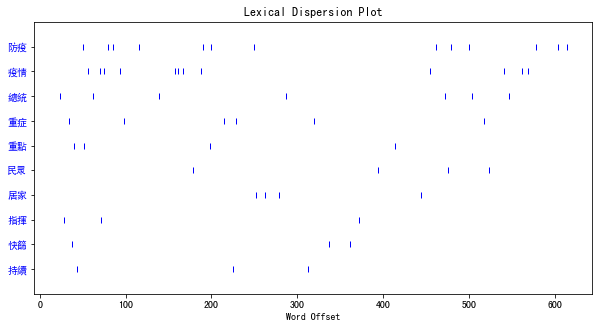

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Diff:  0.29
LCS:  7
Edit distance:  25

A 有時間就陪長輩接種疫苗   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.67
LCS:  11
Edit distance:  7

A 有時間就陪長輩接種疫苗   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.86
LCS:  16
Edit distance:  3

A 有時間就陪長輩接種疫苗   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.51
LCS:  9
Edit distance:  12

【關鍵字】： 防疫
A 繼續團結防疫   (19)                                      B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.42
LCS:  7
Edit distance:  14

A 繼續團結防疫   (19)                                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  2
Edit distance:  17

A 繼續團結防疫   (19)                                      B 持續團結防疫   (4)                                      
Diff:  0.8
LCS:  10
Edit distance:  3

A 感謝2年多來中央、地方及民間無數防疫英雄...   (19)                     B 並給予第一線防疫同仁加油打氣   (4)

127.0.0.1 - - [05/Jul/2022 03:08:15] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:09:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:09:14] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:09:14] "GET /uploads/TEXT1.txt HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


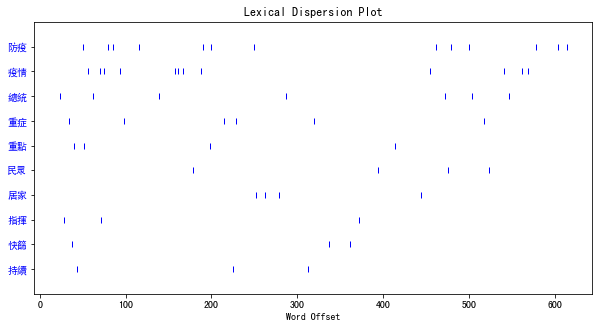

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Diff:  0.46
LCS:  8
Edit distance:  10

A 民眾應主動配合防疫工作   (15)                                 B 則分別安排入住加強版集中檢疫所、防疫旅館...   (14)                    
Diff:  0.33
LCS:  8
Edit distance:  22

【關鍵字】： 長輩
A 長輩是重症死亡高風險群   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.42
LCS:  7
Edit distance:  13

A 長輩是重症死亡高風險群   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.38
LCS:  7
Edit distance:  14

A 長輩是重症死亡高風險群   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.4
LCS:  7
Edit distance:  13

A 建議民眾一起關心身邊長輩健康   (17)                              B 提醒長輩接種疫苗   (22)                                   
Diff:  0.39
LCS:  7
Edit distance:  16

A 建議民眾一起關心身邊長輩健康   (17...                            B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.29
LCS:  6
Edit distance:  19

A 建議民眾一起關心身邊長輩健康   (17...                            B 提升長輩的疫苗覆蓋率   (22)   

127.0.0.1 - - [05/Jul/2022 03:09:17] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:10:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:10:35] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:10:35] "GET /uploads/dict.txt HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:10:40] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:10:40] "GET /uploads/mayday.txt HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


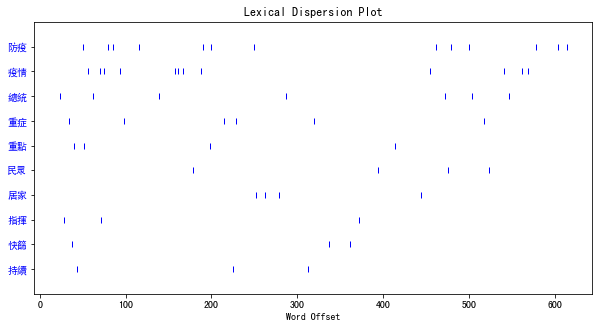

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  11
Edit distance:  9

A 有時間就陪長輩接種疫苗   (17)                                 B 第四個措施是「持續提高疫苗覆蓋率」   (22)                          
Diff:  0.33
LCS:  7
Edit distance:  17

A 有時間就陪長輩接種疫苗   (17)                                 B 目前疫苗覆蓋率第一劑是84.57%、第二...   (22)                    
Diff:  0.29
LCS:  7
Edit distance:  25

A 有時間就陪長輩接種疫苗   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.67
LCS:  11
Edit distance:  7

A 有時間就陪長輩接種疫苗   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.86
LCS:  16
Edit distance:  3

A 有時間就陪長輩接種疫苗   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.51
LCS:  9
Edit distance:  12

【關鍵字】： 防疫
A 繼續團結防疫   (19)                                      B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.42
LCS:  7
Edit distance:  14

A 繼續團結防疫   (19)                                      B 蔡總統也宣布目前有4個重點防疫措施              

127.0.0.1 - - [05/Jul/2022 03:10:42] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:13:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:13:12] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:13:12] "GET /uploads/mayday.txt HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:13:16] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:13:16] "GET /uploads/single.txt HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


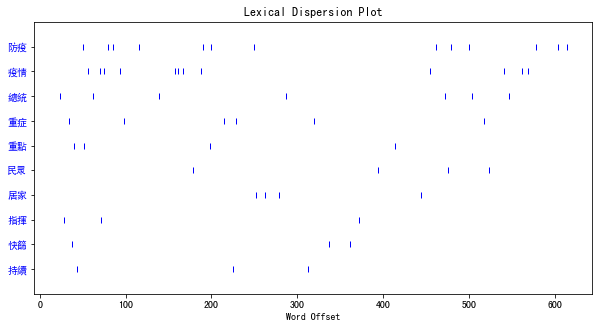

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  8
Edit distance:  22

A 初步規劃徵用約1億7000萬劑家用快篩試...   (13)                     B 因此政府也規劃從近期開始來實施「家用快篩...   (18)                    
Diff:  0.5
LCS:  15
Edit distance:  18

A 國內也組成快篩國家隊   (13)                                  B 第二個措施是「家用快篩實名制」   (18)                            
Diff:  0.41
LCS:  8
Edit distance:  14

A 國內也組成快篩國家隊   (13)                                  B 目前初步規劃徵用大約1億7千萬劑的家用快...   (18)                    
Diff:  0.3
LCS:  7
Edit distance:  23

A 國內也組成快篩國家隊   (13)                                  B 國內也組成了「快篩國家隊」   (18)                              
Diff:  0.86
LCS:  16
Edit distance:  4

A 國內也組成快篩國家隊   (13)                                  B 因此政府也規劃從近期開始來實施「家用快篩...   (18)                    
Diff:  0.38
LCS:  9
Edit distance:  21

A 民眾可以更方便方式、合理價格取得快篩試劑   (13)                        B 第二個措施是「家用快篩實名制」   (18)                            
Diff:  0.33
LCS:  8
Edit distance:  21

A 民眾可以更方便方式、合理價格取得快篩試劑...   (13)                     B 目前初步規劃徵用大約1億7千萬劑的家用快...   (18)            

127.0.0.1 - - [05/Jul/2022 03:13:18] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:15:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:15:10] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:15:10] "GET /uploads/dict.txt HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:15:13] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:15:13] "GET /uploads/mayday.txt HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


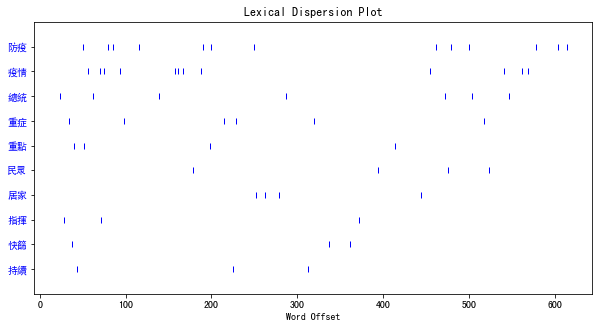

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  11
Edit distance:  21

A 民眾應主動配合防疫工作   (15)                                 B 蔡總統說台灣要邁入防疫新階段   (14)                             
Diff:  0.41
LCS:  8
Edit distance:  13

A 民眾應主動配合防疫工作   (15)                                 B 有四個重點的防疫措施   (14)                                 
Diff:  0.46
LCS:  8
Edit distance:  10

A 民眾應主動配合防疫工作   (15)                                 B 則分別安排入住加強版集中檢疫所、防疫旅館...   (14)                    
Diff:  0.33
LCS:  8
Edit distance:  22

【關鍵字】： 長輩
A 長輩是重症死亡高風險群   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.42
LCS:  7
Edit distance:  13

A 長輩是重症死亡高風險群   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.38
LCS:  7
Edit distance:  14

A 長輩是重症死亡高風險群   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.4
LCS:  7
Edit distance:  13

A 建議民眾一起關心身邊長輩健康   (17)                              B 提醒長輩接種疫苗   (22)                

127.0.0.1 - - [05/Jul/2022 03:15:15] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:21:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:21:56] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:21:56] "GET /uploads/TEXT1.txt HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


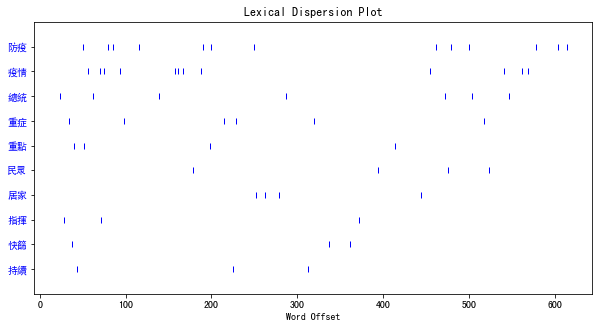

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  7
Edit distance:  12

A 疫情邁入防疫新階段   (5)                                    B 參照國外疫情發展經驗與專家評估   (9)                             
Diff:  0.39
LCS:  7
Edit distance:  14

A 疫情邁入防疫新階段   (5)                                    B 「目前台灣的疫情還沒有到達高峰   (9)                             
Diff:  0.39
LCS:  7
Edit distance:  14

A 疫情邁入防疫新階段   (5)                                    B 本土疫情將持續升溫   (9)                                   
Diff:  0.47
LCS:  7
Edit distance:  10

A 疫情邁入防疫新階段   (5)                                    B 疫情的健康風險相對較低   (9)                                 
Diff:  0.44
LCS:  7
Edit distance:  10

【關鍵字】： 疫情
A 參照其他國家疫情經驗   (5)                                   B 面對這波疫情變化   (11)                                   
Diff:  0.45
LCS:  7
Edit distance:  10

A 參照其他國家疫情經驗   (5)                                   B 指揮中心和專家小組都有掌握疫情發展   (11)                          
Diff:  0.4
LCS:  8
Edit distance:  16

A 現階段疫情尚未達高峰   (5)                                   B 面對這波疫情變化   (11)                 

127.0.0.1 - - [05/Jul/2022 03:22:00] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:22:15] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:22:15] "GET /uploads/TEXT1.txt HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:23:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:23:23] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:23:23] "GET /uploads/single.txt HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


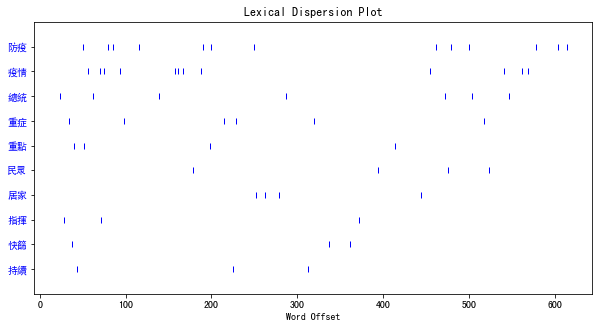

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

A 長輩是重症死亡高風險群   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.42
LCS:  7
Edit distance:  13

A 長輩是重症死亡高風險群   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.38
LCS:  7
Edit distance:  14

A 長輩是重症死亡高風險群   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.4
LCS:  7
Edit distance:  13

A 建議民眾一起關心身邊長輩健康   (17)                              B 提醒長輩接種疫苗   (22)                                   
Diff:  0.39
LCS:  7
Edit distance:  16

A 建議民眾一起關心身邊長輩健康   (17...                            B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.29
LCS:  6
Edit distance:  19

A 建議民眾一起關心身邊長輩健康   (17...                            B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.3
LCS:  6
Edit distance:  19

A 有時間就陪長輩接種疫苗   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.67
LCS:  11

127.0.0.1 - - [05/Jul/2022 03:23:25] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:27:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:27:49] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:27:49] "GET /uploads/single.txt HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


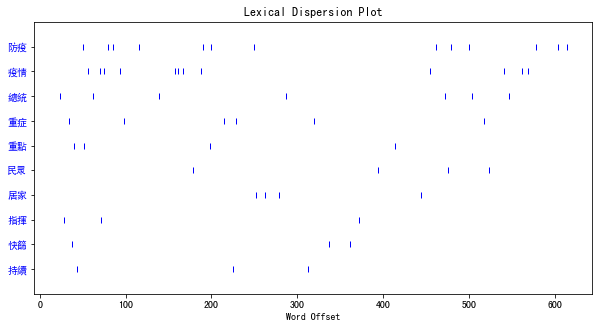

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Edit distance:  21

A 民眾可以更方便方式、合理價格取得快篩試劑...   (13)                     B 目前初步規劃徵用大約1億7千萬劑的家用快...   (18)                    
Diff:  0.33
LCS:  10
Edit distance:  21

A 民眾可以更方便方式、合理價格取得快篩試劑...   (13)                     B 國內也組成了「快篩國家隊」   (18)                              
Diff:  0.32
LCS:  8
Edit distance:  22

A 民眾可以更方便方式、合理價格取得快篩試劑...   (13)                     B 因此政府也規劃從近期開始來實施「家用快篩...   (18)                    
Diff:  0.37
LCS:  11
Edit distance:  21

【關鍵字】： 防疫
A 「讓防疫生活、經濟平衡是我們目標」   (15)                           B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.32
LCS:  7
Edit distance:  19

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.09
LCS:  2
Edit distance:  29

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 持續團結防疫   (4)                                      
Diff:  0.33
LCS:  7
Edit distance:  25

A 民眾應主動配合防疫工作   (15)                                 B 並給予第一線防疫同仁加油打氣   (4)                 

127.0.0.1 - - [05/Jul/2022 03:27:51] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:28:38] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:28:38] "GET /uploads/TEXT1.txt HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:30:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:30:53] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:30:53] "GET /uploads/TEXT1.txt HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 03:30:57] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 03:30:57] "GET /uploads/TEXT2.txt HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


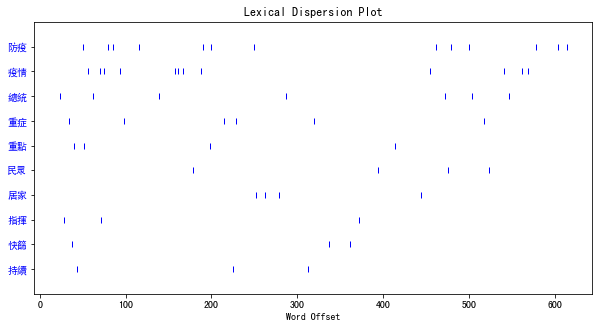

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  2
Edit distance:  17

A 繼續團結防疫   (19)                                      B 持續團結防疫   (4)                                      
Diff:  0.8
LCS:  10
Edit distance:  3

A 感謝2年多來中央、地方及民間無數防疫英雄...   (19)                     B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.28
LCS:  7
Edit distance:  24

A 感謝2年多來中央、地方及民間無數防疫英雄...   (19)                     B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.09
LCS:  2
Edit distance:  28

A 感謝2年多來中央、地方及民間無數防疫英雄...   (19)                     B 持續團結防疫   (4)                                      
Diff:  0.33
LCS:  7
Edit distance:  23

A 讓台灣防疫成為世界羨慕焦點   (19)                               B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.35
LCS:  7
Edit distance:  16

A 讓台灣防疫成為世界羨慕焦點   (19)                               B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.11
LCS:  2
Edit distance:  19

A 讓台灣防疫成為世界羨慕焦點   (19)                               B 持續團結防疫   (4)                              

127.0.0.1 - - [05/Jul/2022 03:30:59] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 04:24:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 04:24:07] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 04:24:07] "GET /uploads/TEXT1.txt HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 04:24:11] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 04:24:11] "GET /uploads/TEXT2.txt HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


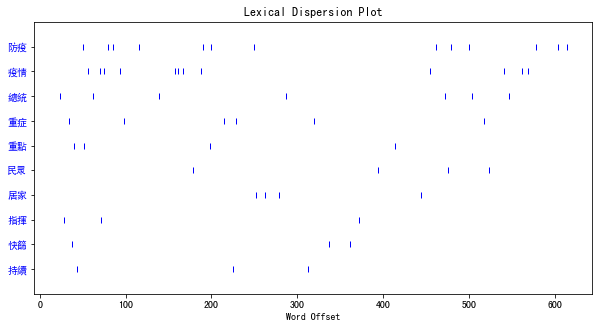

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  8
Edit distance:  22

A 初步規劃徵用約1億7000萬劑家用快篩試...   (13)                     B 因此政府也規劃從近期開始來實施「家用快篩...   (18)                    
Diff:  0.5
LCS:  15
Edit distance:  18

A 國內也組成快篩國家隊   (13)                                  B 第二個措施是「家用快篩實名制」   (18)                            
Diff:  0.41
LCS:  8
Edit distance:  14

A 國內也組成快篩國家隊   (13)                                  B 目前初步規劃徵用大約1億7千萬劑的家用快...   (18)                    
Diff:  0.3
LCS:  7
Edit distance:  23

A 國內也組成快篩國家隊   (13)                                  B 國內也組成了「快篩國家隊」   (18)                              
Diff:  0.86
LCS:  16
Edit distance:  4

A 國內也組成快篩國家隊   (13)                                  B 因此政府也規劃從近期開始來實施「家用快篩...   (18)                    
Diff:  0.38
LCS:  9
Edit distance:  21

A 民眾可以更方便方式、合理價格取得快篩試劑   (13)                        B 第二個措施是「家用快篩實名制」   (18)                            
Diff:  0.33
LCS:  8
Edit distance:  21

A 民眾可以更方便方式、合理價格取得快篩試劑...   (13)                     B 目前初步規劃徵用大約1億7千萬劑的家用快...   (18)            

127.0.0.1 - - [05/Jul/2022 04:24:13] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 04:24:23] "POST /download HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2022 04:24:27] "POST /download HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2022 04:24:42] "POST /download HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2022 04:50:12] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


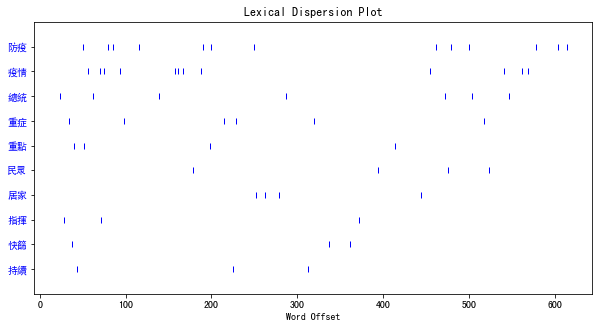

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Edit distance:  21

【關鍵字】： 總統
A 蔡總統也強調   (11)                                      B 就要越冷靜」 總統籲國人團結防疫
   (24)                          
Diff:  0.38
LCS:  7
Edit distance:  17

【關鍵字】： 總統
A 蔡總統也強調   (11)                                      B 蔡總統說   (25)                                       
Diff:  0.67
LCS:  8
Edit distance:  5

【關鍵字】： 總統
A 蔡總統也強調   (11)                                      B 蔡總統也感謝所有的台灣人民   (27)                              
Diff:  0.55
LCS:  9
Edit distance:  11

【關鍵字】： 快篩
A 推動「家用快篩實名制」   (13)                                 B 第二個措施是「家用快篩實名制」   (18)                            
Diff:  0.75
LCS:  15
Edit distance:  7

A 推動「家用快篩實名制」   (13)                                 B 目前初步規劃徵用大約1億7千萬劑的家用快...   (18)                    
Diff:  0.38
LCS:  9
Edit distance:  23

A 推動「家用快篩實名制」   (13)                                 B 國內也組成了「快篩國家隊」   (18)                              
Diff:  0.53
LCS:  10
Edit distance:  11

A 推動「家用快篩實名制」   (13)                                 B 因此政府也規劃從近

127.0.0.1 - - [05/Jul/2022 04:50:17] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 04:50:23] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 04:50:23] "GET /uploads/TEXT1.txt HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 04:50:26] "POST /file-upload HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2022 04:50:26] "GET /uploads/TEXT2.txt HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


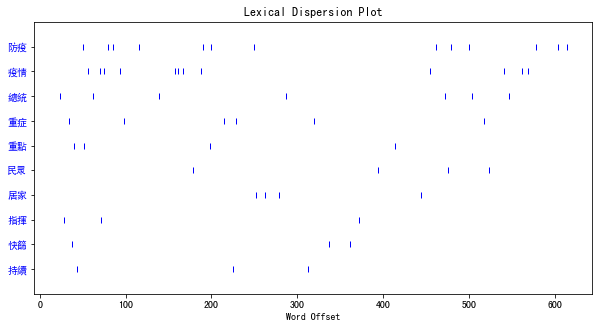

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Edit distance:  21

A 民眾可以更方便方式、合理價格取得快篩試劑...   (13)                     B 國內也組成了「快篩國家隊」   (18)                              
Diff:  0.32
LCS:  8
Edit distance:  22

A 民眾可以更方便方式、合理價格取得快篩試劑...   (13)                     B 因此政府也規劃從近期開始來實施「家用快篩...   (18)                    
Diff:  0.37
LCS:  11
Edit distance:  21

【關鍵字】： 防疫
A 「讓防疫生活、經濟平衡是我們目標」   (15)                           B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.32
LCS:  7
Edit distance:  19

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.09
LCS:  2
Edit distance:  29

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 持續團結防疫   (4)                                      
Diff:  0.33
LCS:  7
Edit distance:  25

A 民眾應主動配合防疫工作   (15)                                 B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.37
LCS:  7
Edit distance:  15

A 民眾應主動配合防疫工作   (15)                                 B 蔡總統也宣布目前有4個重點防疫措施                     

127.0.0.1 - - [05/Jul/2022 04:50:29] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 04:51:29] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


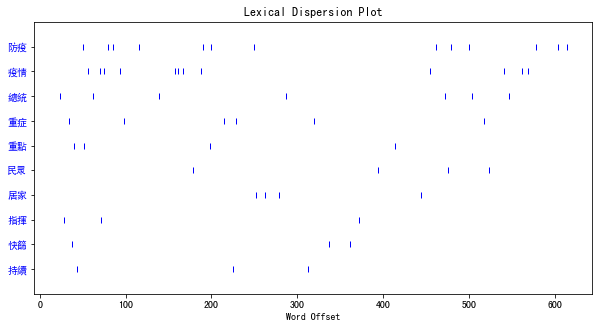

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  11
Edit distance:  21

A 民眾應主動配合防疫工作   (15)                                 B 蔡總統說台灣要邁入防疫新階段   (14)                             
Diff:  0.41
LCS:  8
Edit distance:  13

A 民眾應主動配合防疫工作   (15)                                 B 有四個重點的防疫措施   (14)                                 
Diff:  0.46
LCS:  8
Edit distance:  10

A 民眾應主動配合防疫工作   (15)                                 B 則分別安排入住加強版集中檢疫所、防疫旅館...   (14)                    
Diff:  0.33
LCS:  8
Edit distance:  22

【關鍵字】： 長輩
A 長輩是重症死亡高風險群   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.42
LCS:  7
Edit distance:  13

A 長輩是重症死亡高風險群   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.38
LCS:  7
Edit distance:  14

A 長輩是重症死亡高風險群   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.4
LCS:  7
Edit distance:  13

A 建議民眾一起關心身邊長輩健康   (17)                              B 提醒長輩接種疫苗   (22)                

127.0.0.1 - - [05/Jul/2022 04:51:32] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 04:52:06] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


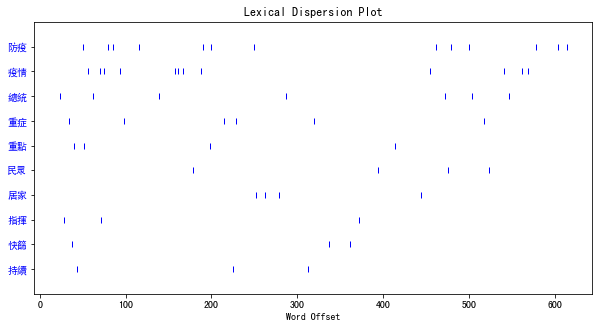

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  8
Edit distance:  22

A 民眾可以更方便方式、合理價格取得快篩試劑...   (13)                     B 因此政府也規劃從近期開始來實施「家用快篩...   (18)                    
Diff:  0.37
LCS:  11
Edit distance:  21

【關鍵字】： 防疫
A 「讓防疫生活、經濟平衡是我們目標」   (15)                           B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.32
LCS:  7
Edit distance:  19

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.09
LCS:  2
Edit distance:  29

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 持續團結防疫   (4)                                      
Diff:  0.33
LCS:  7
Edit distance:  25

A 民眾應主動配合防疫工作   (15)                                 B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.37
LCS:  7
Edit distance:  15

A 民眾應主動配合防疫工作   (15)                                 B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.11
LCS:  2
Edit distance:  18

A 民眾應主動配合防疫工作   (15)                                 B 持續團結防疫   (4)                  

127.0.0.1 - - [05/Jul/2022 04:52:09] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 04:54:15] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


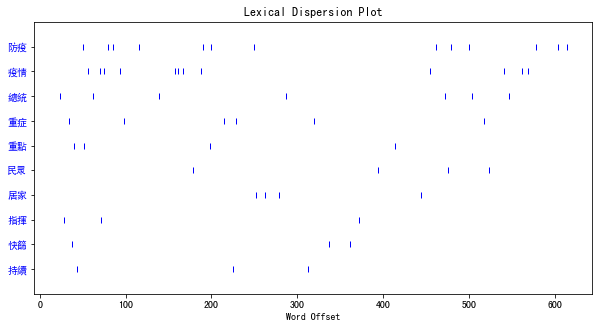

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Edit distance:  24

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 則分別安排入住加強版集中檢疫所、防疫旅館...   (14)                    
Diff:  0.37
LCS:  11
Edit distance:  21

A 民眾應主動配合防疫工作   (15)                                 B 蔡總統說台灣要邁入防疫新階段   (14)                             
Diff:  0.41
LCS:  8
Edit distance:  13

A 民眾應主動配合防疫工作   (15)                                 B 有四個重點的防疫措施   (14)                                 
Diff:  0.46
LCS:  8
Edit distance:  10

A 民眾應主動配合防疫工作   (15)                                 B 則分別安排入住加強版集中檢疫所、防疫旅館...   (14)                    
Diff:  0.33
LCS:  8
Edit distance:  22

【關鍵字】： 長輩
A 長輩是重症死亡高風險群   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.42
LCS:  7
Edit distance:  13

A 長輩是重症死亡高風險群   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.38
LCS:  7
Edit distance:  14

A 長輩是重症死亡高風險群   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                     

127.0.0.1 - - [05/Jul/2022 04:54:17] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 04:54:19] "POST /download HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2022 04:56:29] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


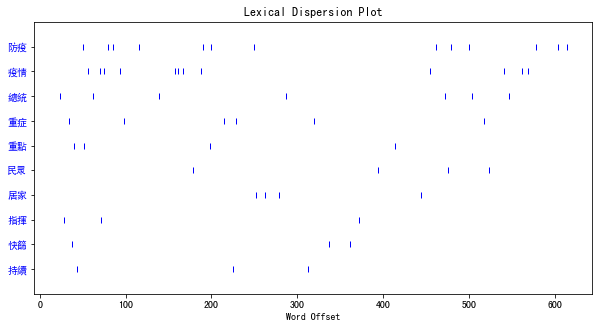

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Edit distance:  22

A 初步規劃徵用約1億7000萬劑家用快篩試...   (13)                     B 因此政府也規劃從近期開始來實施「家用快篩...   (18)                    
Diff:  0.5
LCS:  15
Edit distance:  18

A 國內也組成快篩國家隊   (13)                                  B 第二個措施是「家用快篩實名制」   (18)                            
Diff:  0.41
LCS:  8
Edit distance:  14

A 國內也組成快篩國家隊   (13)                                  B 目前初步規劃徵用大約1億7千萬劑的家用快...   (18)                    
Diff:  0.3
LCS:  7
Edit distance:  23

A 國內也組成快篩國家隊   (13)                                  B 國內也組成了「快篩國家隊」   (18)                              
Diff:  0.86
LCS:  16
Edit distance:  4

A 國內也組成快篩國家隊   (13)                                  B 因此政府也規劃從近期開始來實施「家用快篩...   (18)                    
Diff:  0.38
LCS:  9
Edit distance:  21

A 民眾可以更方便方式、合理價格取得快篩試劑   (13)                        B 第二個措施是「家用快篩實名制」   (18)                            
Diff:  0.33
LCS:  8
Edit distance:  21

A 民眾可以更方便方式、合理價格取得快篩試劑...   (13)                     B 目前初步規劃徵用大約1億7千萬劑的家用快...   (18)                    

127.0.0.1 - - [05/Jul/2022 04:56:32] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 04:59:39] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


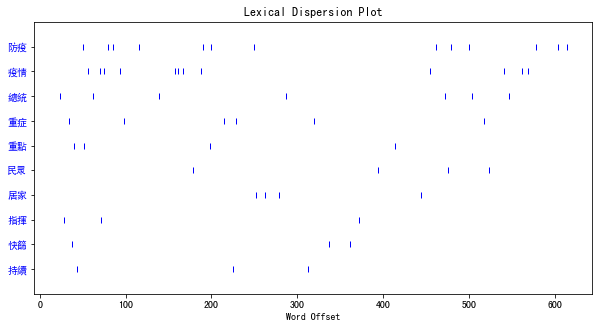

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  7
Edit distance:  19

A 疫情邁入防疫新階段   (5)                                    B 面對這波疫情變化   (11)                                   
Diff:  0.47
LCS:  7
Edit distance:  10

A 疫情邁入防疫新階段   (5)                                    B 指揮中心和專家小組都有掌握疫情發展   (11)                          
Diff:  0.36
LCS:  7
Edit distance:  18

【關鍵字】： 防疫
A 疫情邁入防疫新階段   (5)                                    B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.4
LCS:  7
Edit distance:  13

A 疫情邁入防疫新階段   (5)                                    B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.12
LCS:  2
Edit distance:  17

A 疫情邁入防疫新階段   (5)                                    B 持續團結防疫   (4)                                      
Diff:  0.52
LCS:  7
Edit distance:  8

A 台灣將有4大重點防疫措施   (5)                                 B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.37
LCS:  7
Edit distance:  15

A 台灣將有4大重點防疫措施   (5)                                 B 蔡總統也宣布目前有4個重點防疫措施                

127.0.0.1 - - [05/Jul/2022 04:59:41] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 05:01:29] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


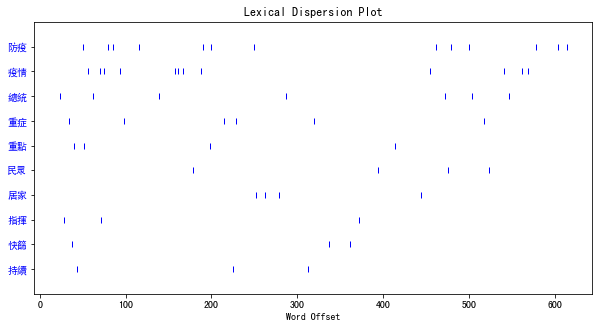

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Edit distance:  13

A 民眾應主動配合防疫工作   (15)                                 B 有四個重點的防疫措施   (14)                                 
Diff:  0.46
LCS:  8
Edit distance:  10

A 民眾應主動配合防疫工作   (15)                                 B 則分別安排入住加強版集中檢疫所、防疫旅館...   (14)                    
Diff:  0.33
LCS:  8
Edit distance:  22

【關鍵字】： 長輩
A 長輩是重症死亡高風險群   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.42
LCS:  7
Edit distance:  13

A 長輩是重症死亡高風險群   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.38
LCS:  7
Edit distance:  14

A 長輩是重症死亡高風險群   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.4
LCS:  7
Edit distance:  13

A 建議民眾一起關心身邊長輩健康   (17)                              B 提醒長輩接種疫苗   (22)                                   
Diff:  0.39
LCS:  7
Edit distance:  16

A 建議民眾一起關心身邊長輩健康   (17...                            B 有時間就陪長輩去接種疫苗   (22)                     

127.0.0.1 - - [05/Jul/2022 05:01:31] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 05:13:01] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


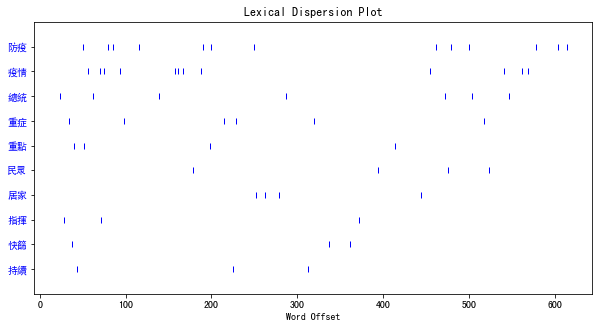

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Diff:  0.32
LCS:  7
Edit distance:  19

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.09
LCS:  2
Edit distance:  29

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 持續團結防疫   (4)                                      
Diff:  0.33
LCS:  7
Edit distance:  25

A 民眾應主動配合防疫工作   (15)                                 B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.37
LCS:  7
Edit distance:  15

A 民眾應主動配合防疫工作   (15)                                 B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.11
LCS:  2
Edit distance:  18

A 民眾應主動配合防疫工作   (15)                                 B 持續團結防疫   (4)                                      
Diff:  0.47
LCS:  7
Edit distance:  11

【關鍵字】： 防疫
A 「讓防疫生活、經濟平衡是我們目標」   (15)                           B 蔡總統說台灣要邁入防疫新階段   (14)                             
Diff:  0.36
LCS:  8
Edit distance:  18

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 有四個重點的防疫措施   (14)  

127.0.0.1 - - [05/Jul/2022 05:13:03] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 05:15:30] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']
['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


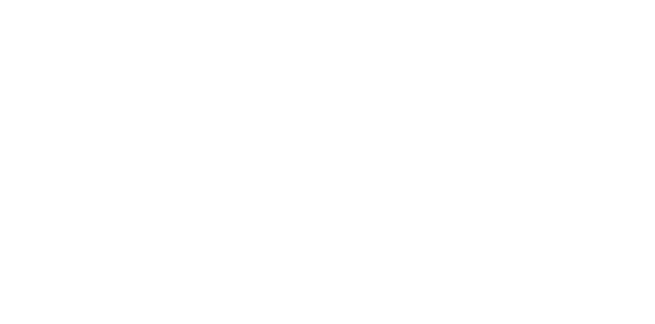

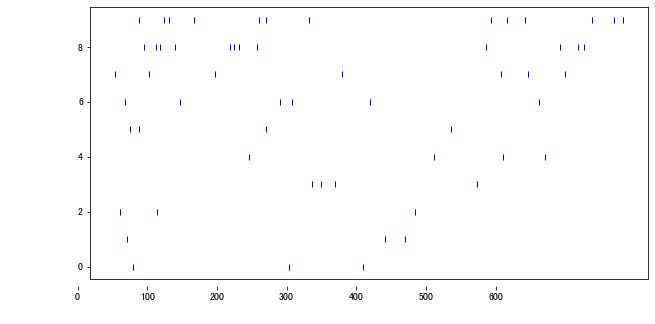

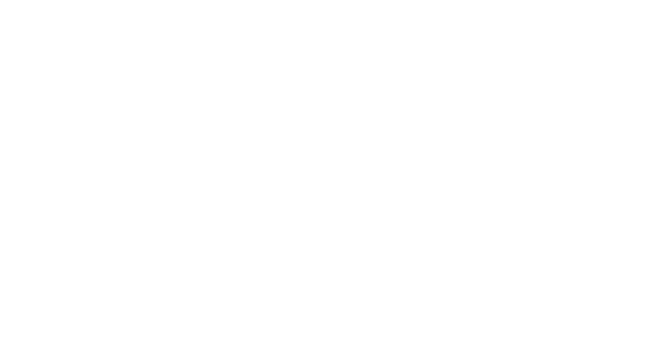

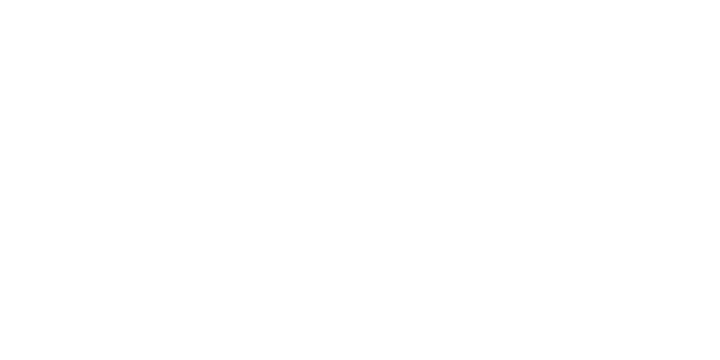

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62['重點', '本土', '記者']


[]

['防疫', '疫情', '戒慎']LCS:  
18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重


Diff:  0.48
LCS:  7
Edit distance:  12

A 強調因應現階段疫情   (3)                                    B 參照國外疫情發展經驗與專家評估   (9)                             
Diff:  0.39Edit distance: 
LCS:  7
Edit distance:  16

A 強調因應現階段疫情   (3)                                    B 「目前台灣的疫情還沒有到達高峰   (9)                             
Diff:  0.39
LCS:  10

A 疫情邁入防疫新階段   (5)                                    B 「大家都辛苦了！今天來指揮中心除了聽取疫...   (7)                     
Diff:  0.27
LCS:  6
Edit distance:  23

【關鍵字】： 疫情
A 參照其他國家疫情經驗   (5)                                   B 參照國外疫情發展經驗與專家評估   (9)                             
Diff:  0.65
LCS:  12
Edit distance:  11

A 參照其他國家疫情經驗   (5)                                   B 「目前台灣的疫情還沒有到達高峰   (9)                             
Diff:   0.38
LCS:  7
Edit distance:  14

A 參照其他國家疫情經驗   (5)                                   B 本土疫情將持續升溫   (9)                                   
Diff: 7
Edit distance:  15
 0.45
LCS:  7
Edit distance:  11

A 參照其他國家疫情經驗   (5)                                   

LCS:  2
Edit distance:  29

A 「讓防疫生活、經濟平衡是我們目標」   ...   (15)                     B 持續團結防疫   (4)                                      
Diff:  0.33
LCS:  7 3
Edit distance:  26

【關鍵字】： 總統
A 蔡總統會後向媒體公開發表談話表示   (5)                             B 蔡總統強調   (11)                                      
Diff:  0.47
LCS:  8
Edit distance:  15

【關鍵字】： 總統
A 蔡總統會後向媒體公開發表談話表示   (5)                             B 「疫情還沒到高峰」 蔡總統公布4大防疫重...   (13)                    
Diff:  0.35
LCS:  9
Edit distance:  24

【關鍵字】： 總統
A 蔡總統會後向媒體公開發表談話表示   (5)                             B 就要越冷靜」 總統籲國人團結防疫
   (24)                          
Diff:  0.3
LCS:  7
Edit distance:  19

【關鍵字】： 
Edit distance:  25

A 民眾應主動配合防疫工作   (15)                                 B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.37
LCS:  7
總統Edit distance:  15
A 蔡總統會後向媒體公開發表談話表示   (5)                             B 蔡總統說   (25)                                       
Diff: 
 0.55

A 民眾應主動配合防疫工作   (15)                                 B 蔡總統也宣布目

A 有時間就陪長輩接種疫苗   (17)                                 B 目前疫苗覆蓋率第一劑是84.57%、第二...   (22)                    
Diff:  0.29
LCS:  7
Edit distance:  25

A 有時間就陪長輩接種疫苗   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.67
LCS:  11
Edit distance:  7

A 有時間就陪長輩接種疫苗   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.86
LCS:  16
Edit distance:  3

A 有時間就陪長輩接種疫苗   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.51
LCS:  9
Edit distance:  12

【關鍵字】： 防疫
A 繼續團結防疫   (19)                                      B 並給予第一線防疫同仁加油打氣   (4)                              
Diff:  0.42
LCS:  7
Edit distance:  14

A 繼續團結防疫   (19)                                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  2
Edit distance:  17

A 繼續團結防疫   (19)                                      B 持續團結防疫   (4)                                      
Diff:  0

127.0.0.1 - - [05/Jul/2022 05:15:33] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 05:15:34] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 05:23:35] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


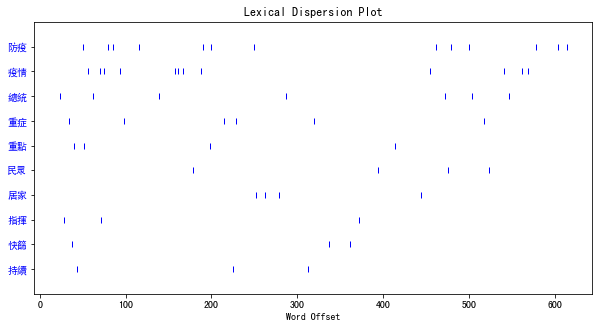

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  16
Edit distance:  3

A 有時間就陪長輩接種疫苗   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.51
LCS:  9
Edit distance:  12

【關鍵字】： 疫苗
A 第四為提高「疫苗覆蓋率」   (17)                                B 第四個措施是「持續提高疫苗覆蓋率」   (22)                          
Diff:  0.7
LCS:  15
Edit distance:  10

A 第四為提高「疫苗覆蓋率」   (17)                                B 目前疫苗覆蓋率第一劑是84.57%、第二...   (22)                    
Diff:  0.41
LCS:  10
Edit distance:  24

A 第四為提高「疫苗覆蓋率」   (17)                                B 提醒長輩接種疫苗   (22)                                   
Diff:  0.47
LCS:  8
Edit distance:  12

A 第四為提高「疫苗覆蓋率」   (17)                                B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.37
LCS:  7
Edit distance:  14

A 第四為提高「疫苗覆蓋率」   (17)                                B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.61
LCS:  11
Edit distance:  9

A 有時間就陪長輩接種疫苗   (17)                                 B 第四個措施是「持續提高疫苗覆蓋率」   (22)      

127.0.0.1 - - [05/Jul/2022 05:23:38] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 05:23:41] "POST /download HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2022 05:25:43] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


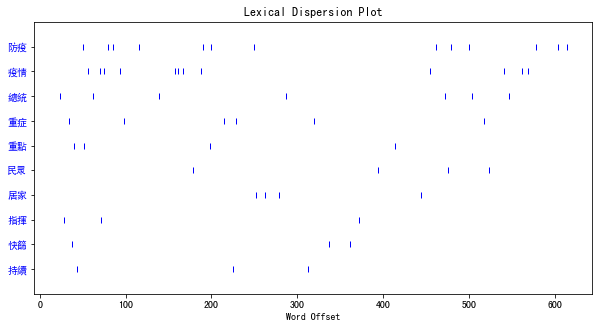

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Edit distance:  7

A 有時間就陪長輩接種疫苗   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.86
LCS:  16
Edit distance:  3

A 有時間就陪長輩接種疫苗   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.51
LCS:  9
Edit distance:  12

【關鍵字】： 疫苗
A 第四為提高「疫苗覆蓋率」   (17)                                B 第四個措施是「持續提高疫苗覆蓋率」   (22)                          
Diff:  0.7
LCS:  15
Edit distance:  10

A 第四為提高「疫苗覆蓋率」   (17)                                B 目前疫苗覆蓋率第一劑是84.57%、第二...   (22)                    
Diff:  0.41
LCS:  10
Edit distance:  24

A 第四為提高「疫苗覆蓋率」   (17)                                B 提醒長輩接種疫苗   (22)                                   
Diff:  0.47
LCS:  8
Edit distance:  12

A 第四為提高「疫苗覆蓋率」   (17)                                B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.37
LCS:  7
Edit distance:  14

A 第四為提高「疫苗覆蓋率」   (17)                                B 提升長輩的疫苗覆蓋率   (22)                      

127.0.0.1 - - [05/Jul/2022 05:25:45] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 05:44:43] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


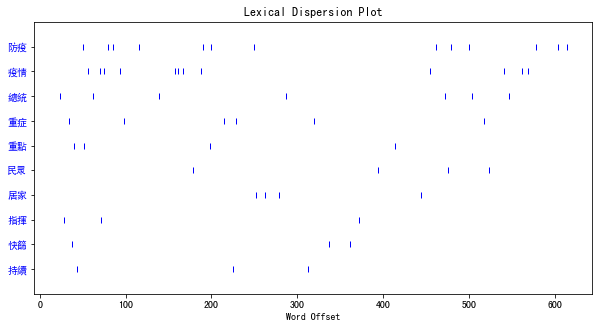

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Edit distance:  14

A 長輩是重症死亡高風險群   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.4
LCS:  7
Edit distance:  13

A 建議民眾一起關心身邊長輩健康   (17)                              B 提醒長輩接種疫苗   (22)                                   
Diff:  0.39
LCS:  7
Edit distance:  16

A 建議民眾一起關心身邊長輩健康   (17...                            B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.29
LCS:  6
Edit distance:  19

A 建議民眾一起關心身邊長輩健康   (17...                            B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.3
LCS:  6
Edit distance:  19

A 有時間就陪長輩接種疫苗   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.67
LCS:  11
Edit distance:  7

A 有時間就陪長輩接種疫苗   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.86
LCS:  16
Edit distance:  3

A 有時間就陪長輩接種疫苗   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 


127.0.0.1 - - [05/Jul/2022 05:44:46] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 17:44:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 17:44:40] "GET /static/Background.png HTTP/1.1" 304 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


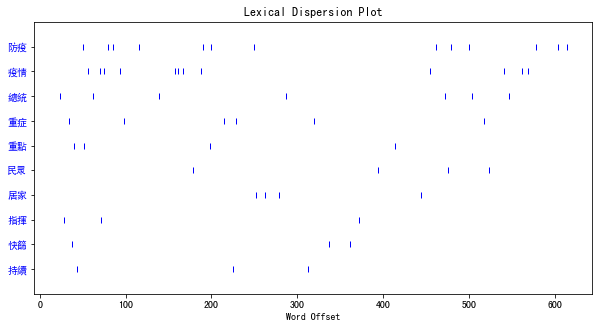

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

LCS:  24
Edit distance:  10

A 初步規劃徵用約1億7000萬劑家用快篩試...   (13)                     B 國內也組成了「快篩國家隊」   (18)                              
Diff:  0.32
LCS:  8
Edit distance:  22

A 初步規劃徵用約1億7000萬劑家用快篩試...   (13)                     B 因此政府也規劃從近期開始來實施「家用快篩...   (18)                    
Diff:  0.5
LCS:  15
Edit distance:  18

A 國內也組成快篩國家隊   (13)                                  B 第二個措施是「家用快篩實名制」   (18)                            
Diff:  0.41
LCS:  8
Edit distance:  14

A 國內也組成快篩國家隊   (13)                                  B 目前初步規劃徵用大約1億7千萬劑的家用快...   (18)                    
Diff:  0.3
LCS:  7
Edit distance:  23

A 國內也組成快篩國家隊   (13)                                  B 國內也組成了「快篩國家隊」   (18)                              
Diff:  0.86
LCS:  16
Edit distance:  4

A 國內也組成快篩國家隊   (13)                                  B 因此政府也規劃從近期開始來實施「家用快篩...   (18)                    
Diff:  0.38
LCS:  9
Edit distance:  21

A 民眾可以更方便方式、合理價格取得快篩試劑   (13)                        B 第二個措施是「家用快篩實名制」   (18)                   

127.0.0.1 - - [05/Jul/2022 17:44:42] "POST /file-compared HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2022 18:19:11] "GET / HTTP/1.1" 200 -


['防疫', '疫情', '總統', '重症', '重點', '民眾', '居家', '指揮', '快篩', '持續']


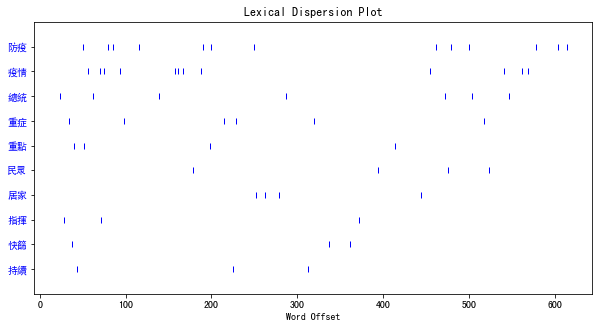

['重點', '本土', '記者']

[]

['防疫', '疫情', '戒慎']

[]

['疫情', '防疫', '總統']

[]

[]

['來源', '蔡英文', '影片']

['照護', '居家', '確診者']

[]

['陸續', '藥物', '總統']

[]

['快篩', '徵用', '篩試劑']

[]

['隔離', '保護', '防疫']

[]

['長輩', '疫苗', '第四為']

[]

['防疫', '團結', '台灣']

['640']

['2022', '26', '週二']

[]

['防疫', '總統', '重點']

[]

['戒慎', '視察', '指揮']

['指揮', '疫情', '大家']

[]

['疫情', '持續', '重症']

[]

['疫情', '戒慎', '總統']

[]

['還沒到', '總統', '重點']

['防疫', '的確', '診者']

[]

['陸續', '萬份', '35']

[]

['快篩', '實名制', '千萬劑']

[]

['匡列', '接觸', '密切']

[]

['疫苗', '覆蓋率', '長輩']

[]

['越近', '冷靜', '總統']

['不眠不休', '總統', '再一次']

[]

['台灣', '總統', '感謝']

[]

['面對', '挑戰', '我們']

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 蔡總統也宣布目前有4個重點防疫措施                                 
Diff:  0.13
LCS:  3
Edit distance:  27

A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 包括「強化輕重症分流」、「家用快篩試劑實...   (4)                     
Diff:  0.62
LCS:  18
Edit distance:  17

【關鍵字】： 重點
A 提出「輕重症分流、快篩實名制、重點疫調、...   (1)                      B 「疫情還沒到

Diff:  0.41
LCS:  8
Edit distance:  13

A 民眾應主動配合防疫工作   (15)                                 B 有四個重點的防疫措施   (14)                                 
Diff:  0.46
LCS:  8
Edit distance:  10

A 民眾應主動配合防疫工作   (15)                                 B 則分別安排入住加強版集中檢疫所、防疫旅館...   (14)                    
Diff:  0.33
LCS:  8
Edit distance:  22

【關鍵字】： 長輩
A 長輩是重症死亡高風險群   (17)                                 B 提醒長輩接種疫苗   (22)                                   
Diff:  0.42
LCS:  7
Edit distance:  13

A 長輩是重症死亡高風險群   (17)                                 B 有時間就陪長輩去接種疫苗   (22)                               
Diff:  0.38
LCS:  7
Edit distance:  14

A 長輩是重症死亡高風險群   (17)                                 B 提升長輩的疫苗覆蓋率   (22)                                 
Diff:  0.4
LCS:  7
Edit distance:  13

A 建議民眾一起關心身邊長輩健康   (17)                              B 提醒長輩接種疫苗   (22)                                   
Diff:  0.39
LCS:  7
Edit distance:  16

A 建議民眾一起關心身邊長輩健康   (17...                            B 有時間就陪長輩去接種疫苗   (22) 

127.0.0.1 - - [05/Jul/2022 18:19:14] "POST /file-compared HTTP/1.1" 200 -


In [ ]:
if __name__ == '__main__':
    app.run()